In [1]:
using CSV
using DataFrames

In [3]:
p = "PD31182"
DFpatient = filter(row -> row[:patient] == p, DFcohort);
DFpatient = filter(row -> row[:name] == "wmis", DFpatient)

age = filter(row -> row[:patient] == p, DFdonor)[:Age2][1]
x = LLoptimizationresults(DFpatient[:mle], DFpatient[:A]; t = age, Amin = 2 * 0.0075, ρ = 5000.0)

UndefVarError: UndefVarError: DFcohort not defined

In [160]:
unique(DFdonor[:patient])

9-element Array{Union{Missing, String},1}:
 "PD36806"
 "PD36712"
 "PD30272"
 "PD30986"
 "PD30987"
 "PD30274"
 "PD30988"
 "PD30273"
 "PD31182"

┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


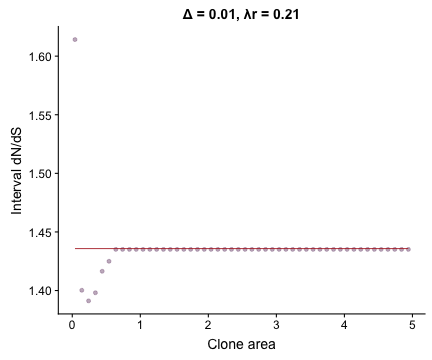

dndsfit(0.005061781261622296, 0.20845129589905798, 50×14 DataFrame. Omitted printing of 8 columns
│ Row │ dnds     │ A       │ dndsfit │ dndsfitlq │ dndsfituq │ deltafit   │
│     │ Float64⍰ │ Float64 │ Float64 │ Float64   │ Float64   │ Float64    │
├─────┼──────────┼─────────┼─────────┼───────────┼───────────┼────────────┤
│ 1   │ 1.61415  │ 0.04    │ 1.43582 │ 1.43582   │ 1.43582   │ 0.00506178 │
│ 2   │ 1.40024  │ 0.14    │ 1.43582 │ 1.43582   │ 1.43582   │ 0.00506178 │
│ 3   │ 1.3912   │ 0.24    │ 1.43582 │ 1.43582   │ 1.43582   │ 0.00506178 │
│ 4   │ 1.39812  │ 0.34    │ 1.43582 │ 1.43582   │ 1.43582   │ 0.00506178 │
│ 5   │ 1.41645  │ 0.44    │ 1.43582 │ 1.43582   │ 1.43582   │ 0.00506178 │
│ 6   │ 1.42497  │ 0.54    │ 1.43582 │ 1.43582   │ 1.43582   │ 0.00506178 │
│ 7   │ 1.43513  │ 0.64    │ 1.43582 │ 1.43582   │ 1.43582   │ 0.00506178 │
│ 8   │ 1.43513  │ 0.74    │ 1.43582 │ 1.43582   │ 1.43582   │ 0.00506178 │
│ 9   │ 1.43513  │ 0.84    │ 1.43582 │ 1.43582   │ 1.43582   │ 0.0

In [93]:
p = "PD30272"
DFpatient = filter(row -> row[:patient] == p, DFcohort);
DFpatient = filter(row -> row[:name] == "wmis", DFpatient)

age = filter(row -> row[:patient] == p, DFdonor)[:Age2][1]
x = LLoptimizationresults(DFpatient[:mle], DFpatient[:A]; t = age, Amin = 2 * 0.0075, ρ = 5000.0)

# Cohort level data

In [2]:
# load functions to fit data via least squares
include("julia/optim.jl")

LLoptimizationresults (generic function with 1 method)

In [4]:
DFdonor = CSV.read("data/esophagus/donorinfo.csv");
DFcohort = CSV.read("data/esophagus/dnds_patient_combined.csv");
DFcohort[:A] = 2 * DFcohort[:areacutoff];

In [5]:
myDFmiss = DataFrame([Float64, Float64, Float64, Float64, Float64, Float64,
    Float64, Float64, Float64, Float64, Float64, Float64,
    Float64, Float64, String, String, Float64, Float64], 
[:dnds, :A, :dndsfit, :dndsfitlq, :dndsfituq, :deltafit, :lambdarfit, 
    :deltafitlq, :lambdarfitlq, :deltafituq, :lambdarfituq, :sedelta, :selambda,  
    :rsq, :patient, :Age, :Age2, :nmutations], 0)

for p in DFdonor[:patient]
    println(p)
    DFpatient = filter(row -> row[:patient] == p, DFcohort);
    DFpatient = filter(row -> row[:name] == "wmis", DFpatient)
    if DFpatient[:mle][1] == 0.0
        continue
    end
    age = filter(row -> row[:patient] == p, DFdonor)[:Age2][1]
    x = LLoptimizationresults(DFpatient[:mle], DFpatient[:A]; t = age, Amin = 2 * 0.0075, ρ = 5000.0)
    x.DF[:patient] = p
    x.DF[:Age] = filter(row -> row[:patient] == p, DFdonor)[:Age][1]
    x.DF[:Age2] = age
    x.DF[:nmutations] = DFpatient[:nmutations]
    append!(myDFmiss, x.DF)
end

myDFnon = DataFrame([Float64, Float64, Float64, Float64, Float64, Float64,
    Float64, Float64, Float64, Float64, Float64, Float64,
    Float64, Float64, String, String, Float64, Float64], 
[:dnds, :A, :dndsfit, :dndsfitlq, :dndsfituq, :deltafit, :lambdarfit, 
    :deltafitlq, :lambdarfitlq, :deltafituq, :lambdarfituq, :sedelta, :selambda,  
    :rsq, :patient, :Age, :Age2, :nmutations], 0)

for p in DFdonor[:patient]
    println(p)
    DFpatient = filter(row -> row[:patient] == p, DFcohort);
    DFpatient = filter(row -> row[:name] == "wnon", DFpatient)
    if DFpatient[:mle][1] == 0.0
        continue
    end
    age = filter(row -> row[:patient] == p, DFdonor)[:Age2][1]
    x = LLoptimizationresults(DFpatient[:mle], DFpatient[:A]; t = age, Amin = 2 * 0.0075, ρ = 5000.0)
    x.DF[:patient] = p
    x.DF[:Age] = filter(row -> row[:patient] == p, DFdonor)[:Age][1]
    x.DF[:Age2] = age
    x.DF[:nmutations] = DFpatient[:nmutations]
    append!(myDFnon, x.DF)
end

myDFall = DataFrame([Float64, Float64, Float64, Float64, Float64, Float64,
    Float64, Float64, Float64, Float64, Float64, Float64,
    Float64, Float64, String, String, Float64, Float64], 
[:dnds, :A, :dndsfit, :dndsfitlq, :dndsfituq, :deltafit, :lambdarfit, 
    :deltafitlq, :lambdarfitlq, :deltafituq, :lambdarfituq, :sedelta, :selambda,  
    :rsq, :patient, :Age, :Age2, :nmutations], 0)

for p in DFdonor[:patient]
    println(p)
    DFpatient = filter(row -> row[:patient] == p, DFcohort);
    DFpatient = filter(row -> row[:name] == "wall", DFpatient)
    if DFpatient[:mle][1] == 0.0
        continue
    end
    age = filter(row -> row[:patient] == p, DFdonor)[:Age2][1]
    x = LLoptimizationresults(DFpatient[:mle], DFpatient[:areacutoff]; t = age, Amin = 0.01, ρ = 5000.0)
    x.DF[:patient] = p
    x.DF[:Age] = filter(row -> row[:patient] == p, DFdonor)[:Age][1]
    x.DF[:Age2] = age
    x.DF[:nmutations] = DFpatient[:nmutations]
    append!(myDFall, x.DF)
end

PD36806


┌ Warning: RCall.jl: 
│ Attaching package: ‘cowplot’
│ 
│ The following object is masked from ‘package:ggplot2’:
│ 
│     ggsave
│ 
└ @ RCall /Users/marcwilliams/.julia/packages/RCall/ffM0W/src/io.jl:113


PD36712
PD30272
PD30986


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD30987
PD30274
PD30988
PD30273
PD31182
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182


In [6]:
@rput myDFmiss
@rput myDFnon
R"""
library(readr)

write_csv(myDFmiss, "FinalFigures/data_for_figures/esophagus_dnds_missense.csv")
write_csv(myDFnon, "FinalFigures/data_for_figures/esophagus_dnds_nonsense.csv")

""";

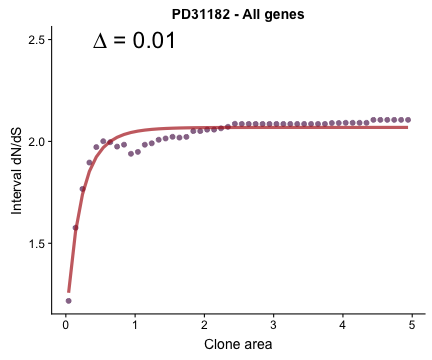

RObject{VecSxp}


┌ Warning: RCall.jl: Warning in is.na(x) :
│   is.na() applied to non-(list or vector) of type 'expression'
└ @ RCall /Users/marcwilliams/.julia/packages/RCall/ffM0W/src/io.jl:113


In [8]:
# create a single plot for patient
R"""
library(dplyr)
gpatient <- myDFmiss %>%
    filter(	patient == "PD31182") %>%
    mutate(p = paste0(patient, ", ", Age)) %>%
    ggplot(aes(x = A, y = dnds)) +
    geom_point(alpha = 0.9, col = "plum4", size = 2) +
    geom_line(aes(y = dndsfit), alpha = 0.7, size = 1.5, col = "firebrick") +
    xlab("Clone area") +
    ylab("Interval dN/dS") +
    ggtitle("PD31182 - All genes") +
    annotate("text", x = 1.0, y = 2.5, label = expression(paste(Delta, " = 0.01")), size = 8)
gpatient
"""

### Fit data per gene

In [ ]:
DF = CSV.File("data/esophagus/dnds_patient_genes_combined.csv") |> DataFrame
DF[:A] = 2 * DF[:areacutoff];

In [98]:
delta = Float64[]
rlam = Float64[]
genevec = String[]
mutationtypevec = String[]
rsqvec = Float64[]
patientvec = String[]
myDFmiss = DataFrame([Float64, Float64, Float64, Float64, Float64, Float64,
    Float64, Float64, Float64, Float64, Float64, Float64,
    Float64, Float64, String, String, Float64, String, Float64], 
    [:dnds, :A, :dndsfit, :dndsfitlq, :dndsfituq, :deltafit, :lambdarfit, 
    :deltafitlq, :lambdarfitlq, :deltafituq, :lambdarfituq, :sedelta, :selambda,  
    :rsq, :patient, :Age, :Age2, :gene, :nmutations], 0)
myDFnon = DataFrame([Float64, Float64, Float64, Float64, Float64, Float64,
    Float64, Float64, Float64, Float64, Float64, Float64,
    Float64, Float64, String, String, Float64, String, Float64], 
    [:dnds, :A, :dndsfit, :dndsfitlq, :dndsfituq, :deltafit, :lambdarfit, 
    :deltafitlq, :lambdarfitlq, :deltafituq, :lambdarfituq, :sedelta, :selambda,  
    :rsq, :patient, :Age, :Age2, :gene, :nmutations], 0)

for gene in unique(DF[:gene_name])
#for gene in ["TP53", "NOTCH1"]
    println(gene)
    DFgene = filter(row -> row[:gene_name] == gene, DF);

    for p in DFdonor[:patient]
        println(p)
        DFpatient = filter(row -> row[:patient] == p, DFgene);
        age = filter(row -> row[:patient] == p, DFdonor)[:Age2][1]
        
        nmuts = DFpatient[:n_syn][end] + DFpatient[:n_mis][end]
        if nmuts < 5
            continue
        end
        
        x = LLoptimizationresults(DFpatient[:wmis_cv], DFpatient[:A]; t = age, Amin = 2 * 0.01, ρ = 5000.0)
        x.DF[:patient] = p
        x.DF[:Age] = filter(row -> row[:patient] == p, DFdonor)[:Age][1]
        x.DF[:Age2] = age
        x.DF[:gene] = gene
        x.DF[:nmutations] = nmuts
        append!(myDFmiss, x.DF)
        push!(delta, x.Δ)
        push!(rlam, x.rλ)
        push!(genevec, gene)
        push!(mutationtypevec, "Missense")
        push!(rsqvec, x.DF[:rsq][1])
        push!(patientvec, p)
    end
    
    for p in DFdonor[:patient]
        println(p)
        DFpatient = filter(row -> row[:patient] == p, DFgene);
        age = filter(row -> row[:patient] == p, DFdonor)[:Age2][1]
        
        nmuts = DFpatient[:n_syn][end] + DFpatient[:n_non][end]
        if nmuts < 5
            continue
        end

        x = LLoptimizationresults(DFpatient[:wnon_cv], DFpatient[:A]; t = age, Amin = 2 * 0.01, ρ = 5000.0)
        x.DF[:patient] = p
        x.DF[:Age] = filter(row -> row[:patient] == p, DFdonor)[:Age][1]
        x.DF[:Age2] = age
        x.DF[:gene] = gene
        x.DF[:nmutations] = nmuts
        append!(myDFnon, x.DF)
        push!(delta, x.Δ)
        push!(rlam, x.rλ)
        push!(genevec, gene)
        push!(mutationtypevec, "Nonsense")
        push!(rsqvec, x.DF[:rsq][1])
        push!(patientvec, p)
    end
end

NOTCH1
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182
NOTCH2
PD36806
PD36712


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182
NOTCH3
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182
PD36806
PD36712
PD30272
PD30986


┌ Warning: Linesearch failed, using alpha = 0.9943200790118712 and exiting optimization.
│ The linesearch exited with message:
│ Linesearch failed to converge, reached maximum iterations 50.
└ @ Optim /Users/marcwilliams/.julia/packages/Optim/ULNLZ/src/utilities/perform_linesearch.jl:47


PD30987
PD30274
PD30988
PD30273
PD31182
CUL3
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD31182
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD30273
PD31182
PTCH1
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD31182
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182
FAT1


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD36806
PD36712


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD30272
PD30986


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD30987
PD30274


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD30988
PD30273
PD31182
PD36806
PD36712


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182
ERBB2
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182
SETD2
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD30988
PD30273
PD31182


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182
RBM10
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182
GRM3
PD36806
PD36712
PD30272
PD30986
PD30987


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137
┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD30274
PD30988
PD30273


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD31182
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD31182
TP63
PD36806
PD36712
PD30272
PD30986
PD30987


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD30274
PD30988
PD30273


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD31182
PD36806
PD36712
PD30272


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137
┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD30986
PD30987
PD30274
PD30988
PD30273
PD31182
ERBB3
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182
FAT4
PD36806
PD36712
PD30272


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD30986
PD30987


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137
┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD30274
PD30988


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD30273
PD31182
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182
CDH1
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182
SOX2
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182
EPHA2
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182
AKT1
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182
TP53
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182
IRF6
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182
MUC17
PD36806
PD3

┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD30987
PD30274


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD30988
PD30273


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD31182
PD36806
PD36712
PD30272
PD30986


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137
┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD30987
PD30274


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137
┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD30988
PD30273
PD31182
BAI3


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD36806
PD36712
PD30272
PD30986
PD30987
PD30274


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD30988
PD30273


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD31182
PD36806
PD36712
PD30272
PD30986


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD30987
PD30274
PD30988
PD30273
PD31182
KMT2C
PD36806
PD36712
PD30272
PD30986
PD30987


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD30274
PD30988


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD30273
PD31182


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137
┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD31182
PCED1B
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182
CREBBP
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182
AKT2
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182
FGFR2
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182
FGFR1
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182
APOB
PD36806
PD36712
PD30272
PD30986
PD30987


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD30274
PD30988


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD30273
PD31182
PD36806
PD36712


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD30272
PD30986
PD30987
PD30274
PD30988


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD30273
PD31182
BRAF
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182
ERBB4
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD31182
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182
FGFR3
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182
KCNH5
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182
DICER1
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD30988
PD30273


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD31182
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182
NF1
PD36806
PD36712
PD30272
PD30986


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD30987
PD30274
PD30988


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137
┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD30273
PD31182


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD36806
PD36712
PD30272
PD30986


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137
┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD30987
PD30274
PD30988
PD30273
PD31182
KMT2D
PD36806
PD36712
PD30272
PD30986


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD30987
PD30274
PD30988
PD30273


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD31182


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD36806
PD36712
PD30272
PD30986


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD30987
PD30274
PD30988
PD30273


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD31182
PIK3CA
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182
CR2
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182
MET
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182
GRIN2A
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137
┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD30273


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD31182
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182
PTPRT
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182
PD36806
PD36712
PD30272
PD30986


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD30987
PD30274
PD30988
PD30273
PD31182
PREX2
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD30273
PD31182
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD30273
PD31182
PPP1R3A
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182
TRIOBP
PD36806
PD36712
PD30272
PD30986


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD30987
PD30274
PD30988
PD30273
PD31182
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182
KMT2A
PD36806
PD36712
PD30272
PD30986


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137
┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD30987
PD30274
PD30988


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD30273
PD31182


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137
┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


ARID1A
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182
PD36806
PD36712
PD30272
PD30986
PD30987


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD30274
PD30988
PD30273
PD31182
ARID2
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD30988
PD30273
PD31182
SPHKAP
PD36806
PD36712
PD30272
PD30986
PD30987


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD30274
PD30988


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD30273
PD31182
PD36806
PD36712
PD30272
PD30986


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD30987
PD30274
PD30988
PD30273
PD31182


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


NSD1
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD31182
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD30988
PD30273
PD31182
ADAMTS18
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD30273
PD31182


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


NFE2L2
PD36806
PD36712
PD30272


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD30986
PD30987
PD30274
PD30988


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD30273
PD31182
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182
FLG2
PD36806
PD36712
PD30272
PD30986
PD30987


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD30274


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD30988
PD30273


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD31182
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182
SCN1A
PD36806
PD36712
PD30272
PD30986
PD30987


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137
┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD30274
PD30988
PD30273
PD31182
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182
SCN11A
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182
NOTCH4
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182
PLCB1
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182
SALL1
PD36806
PD36712
PD30272
PD30986


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD30987
PD30274
PD30988
PD30273
PD31182


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182
HRAS
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182
EGFR
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137
┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182
RB1
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


ADAM29
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182
EZH2
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182
FBXW7
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182
SMO
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182
SMAD4


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182
KEAP1
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182
CASP8
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182
AJUBA
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182
AURKA
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182
PTEN
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182
CCND1
PD36806
PD36712
PD30272
PD30986
PD30987
PD30274
PD30988
PD30273
PD31182
PD36806
PD36712
PD30272
PD309

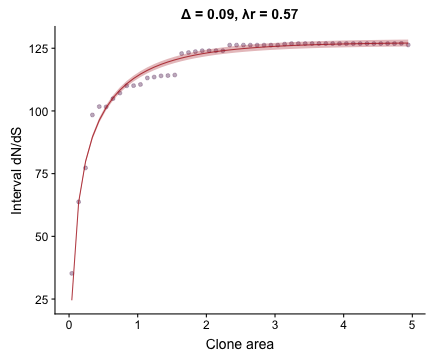

dndsfit(0.08923899245723195, 0.572679015096834, 50×14 DataFrame. Omitted printing of 8 columns
│ Row │ dnds     │ A       │ dndsfit │ dndsfitlq │ dndsfituq │ deltafit │
│     │ Float64⍰ │ Float64 │ Float64 │ Float64   │ Float64   │ Float64  │
├─────┼──────────┼─────────┼─────────┼───────────┼───────────┼──────────┤
│ 1   │ 35.2317  │ 0.04    │ 24.5051 │ 24.2768   │ 24.7368   │ 0.089239 │
│ 2   │ 63.747   │ 0.14    │ 63.6439 │ 63.0201   │ 64.277    │ 0.089239 │
│ 3   │ 77.2913  │ 0.24    │ 79.8012 │ 79.0126   │ 80.6012   │ 0.089239 │
│ 4   │ 98.3992  │ 0.34    │ 89.5533 │ 88.6622   │ 90.4572   │ 0.089239 │
│ 5   │ 101.733  │ 0.44    │ 96.2989 │ 95.3347   │ 97.2767   │ 0.089239 │
│ 6   │ 101.617  │ 0.54    │ 101.306 │ 100.286   │ 102.341   │ 0.089239 │
│ 7   │ 104.889  │ 0.64    │ 105.189 │ 104.125   │ 106.269   │ 0.089239 │
│ 8   │ 107.131  │ 0.74    │ 108.291 │ 107.19    │ 109.407   │ 0.089239 │
│ 9   │ 110.035  │ 0.84    │ 110.822 │ 109.69    │ 111.969   │ 0.089239 │
│ 10  │ 110.084  

In [99]:
DFgene = filter(row -> row[:gene_name] == "NOTCH1", DF);
DFpatient = filter(row -> row[:patient] == "PD30273", DFgene);
age = filter(row -> row[:patient] == "PD30273", DFdonor)[:Age2][1]

x = LLoptimizationresults(DFpatient[:wnon_cv], DFpatient[:A]; t = age, Amin = 2 * 0.01, ρ = 5000.0)

In [62]:
@rput myDFmiss
@rput myDFnon
R"""
library(readr)
write_csv(myDFmiss, "FinalFigures/data_for_figures/esophagus_dnds_missense_pergene.csv")
write_csv(myDFnon, "FinalFigures/data_for_figures/esophagus_dnds_nonsense_pergene.csv")
""";

### Fit data on cohort and per gene for neutral genes

In [16]:
DF = CSV.File("data/esophagus/dnds_combined_neutral.csv") |> DataFrame
DF[:A] = 2 * DF[:areacutoff];

In [25]:
DFpatient = filter(row -> row[:name] == "wall", DF)
DFpatient = filter(row -> row[:A] .> 0.1, DFpatient)

x = LLoptimizationresults(DFpatient[:mle], DFpatient[:A]; t = 70.0, Amin = 0.14, ρ = 5000.0)
allmutations = x.DF
@rput allmutations
R"""
library(readr)
write_csv(allmutations, "FinalFigures/data_for_figures/esophagus_dnds_allmutations_neutral.csv")
""";

In [26]:
DF = CSV.File("data/esophagus/dnds_genes_combined_neutral.csv") |> DataFrame
DF[:A] = 2 * DF[:areacutoff];

In [27]:
delta = Float64[]
rlam = Float64[]
genevec = String[]
mutationtypevec = String[]
rsqvec = Float64[]
patientvec = String[]
myDFmiss = DataFrame([Float64, Float64, Float64, Float64, Float64, Float64,
    Float64, Float64, Float64, Float64, Float64, Float64,
    Float64, Float64, String, String, Float64, String, Float64], 
    [:dnds, :A, :dndsfit, :dndsfitlq, :dndsfituq, :deltafit, :lambdarfit, 
    :deltafitlq, :lambdarfitlq, :deltafituq, :lambdarfituq, :sedelta, :selambda,  
    :rsq, :patient, :Age, :Age2, :gene, :nmutations], 0)
myDFnon = DataFrame([Float64, Float64, Float64, Float64, Float64, Float64,
    Float64, Float64, Float64, Float64, Float64, Float64,
    Float64, Float64, String, String, Float64, String, Float64], 
    [:dnds, :A, :dndsfit, :dndsfitlq, :dndsfituq, :deltafit, :lambdarfit, 
    :deltafitlq, :lambdarfitlq, :deltafituq, :lambdarfituq, :sedelta, :selambda,  
    :rsq, :patient, :Age, :Age2, :gene, :nmutations], 0)

for gene in unique(DF[:gene_name])
    p = "All"
    println(gene)
    DFgene = filter(row -> row[:gene_name] == gene, DF);

    DFpatient = DFgene
    age = 70.0

    nmuts = DFpatient[:n_syn][end] + DFpatient[:n_mis][end]
    if nmuts < 5
        continue
    end

    x = LLoptimizationresults(DFpatient[:wmis_cv], DFpatient[:A]; t = age, Amin = 2 * 0.01, ρ = 5000.0)
    x.DF[:patient] = "All"
    x.DF[:Age] = "$age"
    x.DF[:Age2] = age
    x.DF[:gene] = gene
    x.DF[:nmutations] = nmuts
    append!(myDFmiss, x.DF)
    push!(delta, x.Δ)
    push!(rlam, x.rλ)
    push!(genevec, gene)
    push!(mutationtypevec, "Missense")
    push!(rsqvec, x.DF[:rsq][1])
    push!(patientvec, p)

    DFpatient = DFgene
    age = 70.0

    nmuts = DFpatient[:n_syn][end] + DFpatient[:n_non][end]
    if nmuts < 5
        continue
    end

    x = LLoptimizationresults(DFpatient[:wnon_cv], DFpatient[:A]; t = age, Amin = 2 * 0.01, ρ = 5000.0)
    x.DF[:patient] = "All"
    x.DF[:Age] = "$age"
    x.DF[:Age2] = age
    x.DF[:gene] = gene
    x.DF[:nmutations] = nmuts
    append!(myDFnon, x.DF)
    push!(delta, x.Δ)
    push!(rlam, x.rλ)
    push!(genevec, gene)
    push!(mutationtypevec, "Nonsense")
    push!(rsqvec, x.DF[:rsq][1])
    push!(patientvec, p)
end

BAI3
MUC17


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137
┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137
┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


ADAM29
SETD2
CDKN2A.p14arf
ERBB2
PCED1B
TRIOBP
PTEN


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137
┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PTCH1
NF1
DICER1
NOTCH4


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PREX2


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


FAT4
SOX2
ERBB3
APOB
SCN11A
HRAS
BRAF


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137
┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


AKT2


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


EGFR
KCNH5
CASP8
CDKN2A.p16INK4a
PPP1R3A


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


NRAS
KRAS
RBM10


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


FGFR3
ERBB4


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


CR2
GRIN2A


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


SMAD4
PLCB1


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


KEAP1
FGFR1
AKT1
EZH2


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


GRM3
ADAMTS18


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


AURKA
FLG2
RB1
SMO
PTPRT
NSD1
MET


In [15]:
@rput myDFmiss
@rput myDFnon
R"""
library(readr)
write_csv(myDFmiss, "FinalFigures/data_for_figures/esophagus_dnds_missense_pergene_neutral.csv")
write_csv(myDFnon, "FinalFigures/data_for_figures/esophagus_dnds_nonsense_pergene_neutral.csv")
""";

# Skin data

In [100]:
DFdonor = CSV.read("data/skin/donorinfo.csv");
DFcohort = CSV.read("data/skin/dnds_patient_combined.csv");
DFcohort[:A] = DFcohort[:areacutoff];
patient = unique(DFcohort[:patient])

4-element Array{Union{Missing, String},1}:
 "PD13634"
 "PD18003"
 "PD20399"
 "PD21910"

In [111]:
myDFmiss = DataFrame([Float64, Float64, Float64, Float64, Float64, Float64,
    Float64, Float64, Float64, Float64, Float64, Float64,
    Float64, Float64, String, Float64, Float64], 
    [:dnds, :A, :dndsfit, :dndsfitlq, :dndsfituq, :deltafit, :lambdarfit, 
    :deltafitlq, :lambdarfitlq, :deltafituq, :lambdarfituq, :sedelta, :selambda,  
    :rsq, :patient, :Age, :nmutations], 0)

for p in patient
    println(p)
    DFpatient = filter(row -> row[:patient] == p, DFcohort);
    DFpatient = filter(row -> row[:name] == "wmis", DFpatient)
    if DFpatient[:mle][1] == 0.0
        continue
    end
    age = filter(row -> row[:patient] == p, DFdonor)[:Age][1]
    x = LLoptimizationresults(DFpatient[:mle], DFpatient[:A]; t = age, Amin = 2 * 0.01, ρ = 5000.0)
    x.DF[:patient] = p
    x.DF[:Age] = age
    x.DF[:nmutations] = DFpatient[:nmutations][1]
    append!(myDFmiss, x.DF)
end

myDFnon = DataFrame([Float64, Float64, Float64, Float64, Float64, Float64,
    Float64, Float64, Float64, Float64, Float64, Float64,
    Float64, Float64, String, Float64, Float64], 
    [:dnds, :A, :dndsfit, :dndsfitlq, :dndsfituq, :deltafit, :lambdarfit, 
    :deltafitlq, :lambdarfitlq, :deltafituq, :lambdarfituq, :sedelta, :selambda,  
    :rsq, :patient, :Age, :nmutations], 0)

for p in patient
    println(p)
    DFpatient = filter(row -> row[:patient] == p, DFcohort);
    DFpatient = filter(row -> row[:name] == "wnon", DFpatient)
    if DFpatient[:mle][1] == 0.0
        continue
    end
    age = filter(row -> row[:patient] == p, DFdonor)[:Age][1]
    x = LLoptimizationresults(DFpatient[:mle], DFpatient[:A]; t = age, Amin = 2 * 0.01, ρ = 5000.0)
    x.DF[:patient] = p
    x.DF[:Age] = age
    x.DF[:nmutations] = DFpatient[:nmutations][1]
    append!(myDFnon, x.DF)
end

myDFall = DataFrame([Float64, Float64, Float64, Float64, Float64, Float64,
    Float64, Float64, Float64, Float64, Float64, Float64,
    Float64, Float64, String, Float64, Float64], 
    [:dnds, :A, :dndsfit, :dndsfitlq, :dndsfituq, :deltafit, :lambdarfit, 
    :deltafitlq, :lambdarfitlq, :deltafituq, :lambdarfituq, :sedelta, :selambda,  
    :rsq, :patient, :Age, :nmutations], 0)

for p in patient
    println(p)
    DFpatient = filter(row -> row[:patient] == p, DFcohort);
    DFpatient = filter(row -> row[:name] == "wall", DFpatient)
    if DFpatient[:mle][1] == 0.0
        continue
    end
    age = filter(row -> row[:patient] == p, DFdonor)[:Age][1]
    x = LLoptimizationresults(DFpatient[:mle], DFpatient[:areacutoff]; t = age, Amin = 2 * 0.01, ρ = 5000.0)
    x.DF[:patient] = p
    x.DF[:Age] = age
    x.DF[:nmutations] = DFpatient[:nmutations][1]
    append!(myDFall, x.DF)
end

PD13634
PD18003
PD20399
PD21910
PD13634


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD18003
PD20399
PD21910
PD13634
PD18003
PD20399
PD21910


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


In [112]:
@rput myDFmiss
@rput myDFnon
R"""
library(readr)

write_csv(myDFmiss, "FinalFigures/data_for_figures/skin_dnds_missense.csv")
write_csv(myDFnon, "FinalFigures/data_for_figures/skin_dnds_nonsense.csv")
""";

In [103]:
DF = CSV.File("data/skin/dnds_patient_genes_combined.csv") |> DataFrame
DF[:A] = DF[:areacutoff];

In [114]:
delta = Float64[]
rlam = Float64[]
genevec = String[]
mutationtypevec = String[]
rsqvec = Float64[]
patientvec = String[]
myDFmiss= DataFrame([Float64, Float64, Float64, Float64, Float64, Float64,
    Float64, Float64, Float64, Float64, Float64, Float64,
    Float64, Float64, String, Float64, String, Float64], 
    [:dnds, :A, :dndsfit, :dndsfitlq, :dndsfituq, :deltafit, :lambdarfit, 
    :deltafitlq, :lambdarfitlq, :deltafituq, :lambdarfituq, :sedelta, :selambda,  
    :rsq, :patient, :Age, :gene, :nmutations], 0)
myDFnon = DataFrame([Float64, Float64, Float64, Float64, Float64, Float64,
    Float64, Float64, Float64, Float64, Float64, Float64,
    Float64, Float64, String, Float64, String, Float64], 
    [:dnds, :A, :dndsfit, :dndsfitlq, :dndsfituq, :deltafit, :lambdarfit, 
    :deltafitlq, :lambdarfitlq, :deltafituq, :lambdarfituq, :sedelta, :selambda,  
    :rsq, :patient, :Age, :gene, :nmutations], 0)

for gene in unique(DF[:gene_name])
    println(gene)
    DFgene = filter(row -> row[:gene_name] == gene, DF);

    for p in DFdonor[:patient]
        println(p)
        DFpatient = filter(row -> row[:patient] == p, DFgene);
        age = filter(row -> row[:patient] == p, DFdonor)[:Age][1]
        x = LLoptimizationresults(DFpatient[:wmis_cv], DFpatient[:A]; t = age, Amin = 2 * 0.01, ρ = 5000.0)
        x.DF[:patient] = p
        x.DF[:Age] = age
        x.DF[:gene] = gene
        x.DF[:nmutations] = DFpatient[:n_syn][end] + DFpatient[:n_mis][end] + DFpatient[:n_non][end]
        println(length(x.DF[:A]))
        append!(myDFmiss, x.DF)
        push!(delta, x.Δ)
        push!(rlam, x.rλ)
        push!(genevec, gene)
        push!(mutationtypevec, "Missense")
        push!(rsqvec, x.DF[:rsq][1])
        push!(patientvec, p)
    end
    
    for p in DFdonor[:patient]
        println(p)
        DFpatient = filter(row -> row[:patient] == p, DFgene);

        age = filter(row -> row[:patient] == p, DFdonor)[:Age][1]
        x = LLoptimizationresults(DFpatient[:wnon_cv], DFpatient[:A]; t = age, Amin = 2 * 0.01, ρ = 5000.0)
        x.DF[:patient] = p
        x.DF[:Age] = age
        x.DF[:gene] = gene
        x.DF[:nmutations] = DFpatient[:n_syn][1] + DFpatient[:n_mis][1] + DFpatient[:n_non][1]
        append!(myDFnon, x.DF)
        push!(delta, x.Δ)
        push!(rlam, x.rλ)
        push!(genevec, gene)
        push!(mutationtypevec, "Nonsense")
        push!(rsqvec, x.DF[:rsq][1])
        push!(patientvec, p)
    end
end

SALL1
PD13634
50
PD18003
50
PD20399
50
PD21910


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD13634


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD18003


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD20399
PD21910


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


ADAM29
PD13634


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD18003


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD20399


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD21910


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD13634


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD18003
PD20399
PD21910


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


KCNH5
PD13634


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD18003


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD20399
50
PD21910
50
PD13634


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD18003
PD20399
PD21910


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


SPHKAP
PD13634


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD18003


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD20399
50
PD21910
50
PD13634
PD18003


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD20399
PD21910
NOTCH1
PD13634


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD18003
50
PD20399
50
PD21910
50
PD13634
PD18003
PD20399
PD21910
BAI3
PD13634
50
PD18003
50
PD20399
50
PD21910
50
PD13634
PD18003


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD20399
PD21910


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


CCND1
PD13634


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD18003


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD20399


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD21910
50
PD13634


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD18003
PD20399


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD21910
KMT2C
PD13634


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD18003
50
PD20399
50
PD21910
50
PD13634
PD18003
PD20399
PD21910


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


FAT4
PD13634


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD18003


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD20399
50
PD21910
50
PD13634
PD18003


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137
┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD20399
PD21910
KMT2A
PD13634


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD18003
50
PD20399


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD21910


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD13634


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD18003
PD20399
PD21910
TP53
PD13634


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD18003
50
PD20399
50
PD21910
50
PD13634
PD18003
PD20399
PD21910
PCED1B
PD13634
50
PD18003


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD20399
50
PD21910


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD13634


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD18003
PD20399
PD21910
TRIOBP
PD13634


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD18003


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD20399
50
PD21910
50
PD13634
PD18003
PD20399
PD21910


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


FLG2
PD13634


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD18003
50
PD20399
50
PD21910
50
PD13634


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD18003
PD20399
PD21910


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


ARID1A
PD13634


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD18003
50
PD20399
50
PD21910
50
PD13634


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD18003
PD20399
PD21910


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


CREBBP
PD13634
50
PD18003
50
PD20399
50
PD21910
50
PD13634


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD18003
PD20399
PD21910


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


GRM3
PD13634


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD18003
50
PD20399


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD21910


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD13634
PD18003
PD20399
PD21910


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


EZH2
PD13634


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD18003


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD20399
50
PD21910
50
PD13634


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD18003
PD20399
PD21910


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


FGFR1
PD13634


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD18003


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD20399
50
PD21910


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD13634
PD18003
PD20399
PD21910


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


ARID2
PD13634


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD18003
50
PD20399
50
PD21910
50
PD13634
PD18003
PD20399
PD21910
DICER1
PD13634


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD18003


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD20399
50
PD21910


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD13634
PD18003
PD20399
PD21910


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


SCN1A
PD13634


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD18003
50
PD20399


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD21910


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD13634
PD18003
PD20399
PD21910


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PREX2
PD13634


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD18003


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD20399
50
PD21910
50
PD13634
PD18003
PD20399
PD21910


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


SCN11A
PD13634
50
PD18003


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD20399
50
PD21910
50
PD13634
PD18003
PD20399
PD21910


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PPP1R3A
PD13634


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD18003


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD20399
50
PD21910


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD13634
PD18003
PD20399
PD21910


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


GRIN2A
PD13634
50
PD18003


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD20399


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD21910


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD13634
PD18003
PD20399
PD21910
PTCH1
PD13634


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD18003
50
PD20399
50
PD21910


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD13634


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD18003
PD20399
PD21910
ADAMTS18
PD13634


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD18003
50
PD20399
50
PD21910
50
PD13634


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD18003
PD20399
PD21910
PTPRT
PD13634


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD18003


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD20399
50
PD21910


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD13634
PD18003
PD20399
PD21910
ERBB3
PD13634


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD18003
50
PD20399
50
PD21910
50
PD13634


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD18003
PD20399
PD21910


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


KMT2D
PD13634


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD18003
50
PD20399
50
PD21910


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD13634
PD18003
PD20399
PD21910


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


ERBB2
PD13634


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD18003
50
PD20399
50
PD21910


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD13634


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD18003
PD20399
PD21910


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PLCB1
PD13634


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD18003
50
PD20399


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD21910
50
PD13634
PD18003
PD20399
PD21910


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


ERBB4
PD13634
50
PD18003
50
PD20399


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD21910
50
PD13634
PD18003
PD20399
PD21910


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


CR2
PD13634
50
PD18003
50
PD20399
50
PD21910
50
PD13634
PD18003
PD20399
PD21910
MET


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD13634
50
PD18003
50
PD20399
50
PD21910
50
PD13634


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD18003
PD20399
PD21910


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


EGFR
PD13634
50
PD18003


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD20399
50
PD21910
50
PD13634
PD18003


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD20399
PD21910
PIK3CA
PD13634
50
PD18003


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD20399
50
PD21910
50
PD13634
PD18003
PD20399
PD21910


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


RBM10
PD13634


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD18003
50
PD20399
50
PD21910


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD13634
PD18003
PD20399
PD21910
RB1
PD13634
50
PD18003
50
PD20399
50
PD21910
50
PD13634
PD18003
PD20399
PD21910


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


CDH1
PD13634


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD18003


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD20399
50
PD21910
50
PD13634


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD18003
PD20399
PD21910


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


EPHA2
PD13634


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD18003


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD20399
50
PD21910
50
PD13634
PD18003
PD20399
PD21910


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


BRAF
PD13634


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD18003


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD20399
50
PD21910
50
PD13634
PD18003
PD20399
PD21910


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


FGFR2
PD13634
50
PD18003


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD20399
50
PD21910
50
PD13634
PD18003
PD20399
PD21910


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


FGFR3
PD13634


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD18003


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD20399
50
PD21910
50
PD13634


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD18003
PD20399
PD21910
FAT1
PD13634


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD18003
50
PD20399
50
PD21910


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD13634
PD18003
PD20399
PD21910


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


TP63
PD13634
50
PD18003
50
PD20399


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD21910


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD13634


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD18003
PD20399
PD21910


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


SMO
PD13634


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD18003


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD20399
50
PD21910
50
PD13634


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD18003
PD20399
PD21910


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


FBXW7
PD13634
50
PD18003
50
PD20399
50
PD21910


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD13634
PD18003
PD20399
PD21910


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


CUL3
PD13634


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD18003
50
PD20399
50
PD21910
50
PD13634
PD18003
PD20399
PD21910


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


NFE2L2
PD13634


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD18003
50
PD20399
50
PD21910


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD13634


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD18003
PD20399
PD21910
AJUBA
PD13634


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD18003
50
PD20399
50
PD21910


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD13634


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD18003
PD20399


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD21910
SMAD4
PD13634


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD18003
50
PD20399


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD21910
50
PD13634


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD18003
PD20399


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD21910
KEAP1
PD13634


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD18003
50
PD20399
50
PD21910


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD13634


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD18003
PD20399
PD21910


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


CASP8
PD13634


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD18003
50
PD20399
50
PD21910


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD13634


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD18003
PD20399
PD21910


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


SUFU
PD13634


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD18003
50
PD20399
50
PD21910


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD13634


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD18003
PD20399
PD21910


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


APOB
PD13634
50
PD18003


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD20399
50
PD21910
50
PD13634
PD18003
PD20399
PD21910


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


IRF6
PD13634


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD18003
50
PD20399
50
PD21910


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD13634


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD18003
PD20399
PD21910


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


NOTCH4
PD13634


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD18003
50
PD20399


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD21910
50
PD13634


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD18003
PD20399
PD21910


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


AKT1
PD13634


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD18003


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD20399
50
PD21910
50
PD13634


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD18003
PD20399
PD21910


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


AKT2
PD13634


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD18003
50
PD20399
50
PD21910


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD13634


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD18003
PD20399
PD21910
AURKA
PD13634


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD18003
50
PD20399


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD21910
50
PD13634
PD18003
PD20399
PD21910


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


NOTCH3
PD13634
50
PD18003


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD20399
50
PD21910
50
PD13634
PD18003
PD20399
PD21910
NOTCH2
PD13634
50
PD18003
50
PD20399
50
PD21910
50
PD13634
PD18003
PD20399
PD21910
MUC17
PD13634


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD18003
50
PD20399


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD21910


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD13634


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD18003
PD20399
PD21910
NF1
PD13634


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD18003
50
PD20399
50
PD21910
50
PD13634
PD18003


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD20399
PD21910


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PTEN
PD13634


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD18003
50
PD20399
50
PD21910


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD13634


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD18003
PD20399
PD21910


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


SOX2
PD13634


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD18003
50
PD20399
50
PD21910


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD13634


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD18003
PD20399
PD21910
NSD1
PD13634


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD18003
50
PD20399
50
PD21910


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD13634


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD18003
PD20399
PD21910


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


SETD2
PD13634


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD18003
50
PD20399
50
PD21910
50
PD13634
PD18003
PD20399
PD21910


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


HRAS
PD13634
50
PD18003


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD20399
50
PD21910
50
PD13634


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD18003
PD20399
PD21910


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


KRAS
PD13634
50
PD18003


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD20399
50
PD21910
50
PD13634
PD18003
PD20399


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD21910


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


NRAS
PD13634
50
PD18003
50
PD20399
50
PD21910


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD13634
PD18003
PD20399
PD21910


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


CDKN2A.p16INK4a
PD13634


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD18003
50
PD20399
50
PD21910


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD13634


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD18003
PD20399
PD21910


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


CDKN2A.p14arf
PD13634


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


50
PD18003
50
PD20399
50
PD21910
50
PD13634


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


PD18003
PD20399
PD21910


┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137
┌ Warning: Cannot compute CI intervals, returning MLE for CIs
└ @ Main /Users/marcwilliams/Google Drive/dnds/for_paper/final_notebooks/julia/optim.jl:137


In [115]:
@rput myDFmiss
@rput myDFnon
R"""
write_csv(myDFmiss, "FinalFigures/data_for_figures/skin_dnds_missense_pergene.csv")
write_csv(myDFnon, "FinalFigures/data_for_figures/skin_dnds_nonsense_pergene.csv")
"""

RObject{VecSxp}
             dnds    A      dndsfit    dndsfitlq    dndsfituq      deltafit
1      33.9581326 0.03 4.811204e+00 4.811204e+00 4.811204e+00  2.350886e-02
2       8.7954580 0.08 4.811204e+00 4.811204e+00 4.811204e+00  2.350886e-02
3       4.4966696 0.13 4.811204e+00 4.811204e+00 4.811204e+00  2.350886e-02
4       2.8151877 0.18 4.811204e+00 4.811204e+00 4.811204e+00  2.350886e-02
5       2.4066729 0.23 4.811204e+00 4.811204e+00 4.811204e+00  2.350886e-02
6       2.3437779 0.28 4.811204e+00 4.811204e+00 4.811204e+00  2.350886e-02
7       2.2566002 0.33 4.811204e+00 4.811204e+00 4.811204e+00  2.350886e-02
8       2.2825079 0.38 4.811204e+00 4.811204e+00 4.811204e+00  2.350886e-02
9       2.2600260 0.43 4.811204e+00 4.811204e+00 4.811204e+00  2.350886e-02
10      2.2520042 0.48 4.811204e+00 4.811204e+00 4.811204e+00  2.350886e-02
11      2.2458910 0.53 4.811204e+00 4.811204e+00 4.811204e+00  2.350886e-02
12      4.5445310 0.58 4.811204e+00 4.811204e+00 4.811204e+00  2.350886e